In [16]:
from dataloader.dataloader import JeopardyDataLoader
from utils.constants import DEFAULT_DATA_PATH
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm

dl = JeopardyDataLoader(DEFAULT_DATA_PATH)
for row in dl.iter_rows():
    print(row["category"], row["air_date"], row["question"], row["value"], row["answer"], row["round"], row["show_number"])
    break

HISTORY 2004-12-31 'For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory' $200 Copernicus Jeopardy! 4680


In [18]:
# --- Initialize Counters ---
value_counts = Counter()
category_counts = Counter()
round_counts = Counter()
year_counts = Counter()

# --- Initialize Lists for Distributions ---
question_lengths = []
answer_lengths = []

# --- Initialize Loader ---
print("Starting data aggregation...")
dl = JeopardyDataLoader(DEFAULT_DATA_PATH)
total_rows = 217000 # Approximate total for the progress bar

# --- Run the Loop ---
# We wrap the iterator in tqdm() to get a live progress bar
for row in tqdm(dl.iter_rows(), total=total_rows, desc="Processing rows"):
    
    # 1. Count Values
    # --- THIS IS THE FIXED LINE ---
    # We now check if the value is an integer before comparing it.
    if isinstance(row['value'], int) and row['value'] > 0:
        value_counts[row['value']] += 1
        
    # 2. Count Categories
    if row['category']:
        category_counts[row['category']] += 1
        
    # 3. Count Rounds
    if row['round']:
        round_counts[row['round']] += 1
        
    # 4. Count Years
    if row['air_date']:
        # Use str.split to be safer than slicing
        year_parts = row['air_date'].split('-')
        if len(year_parts) > 0:
            year = year_parts[0]
            year_counts[year] += 1
        
    # 5. Collect Text Lengths
    if row['question']:
        question_lengths.append(len(row['question']))
        
    if row['answer']:
        answer_lengths.append(len(row['answer']))

print("Aggregation complete!")

Starting data aggregation...


Processing rows: 100%|█████████▉| 216930/217000 [00:01<00:00, 145469.80it/s]

Aggregation complete!


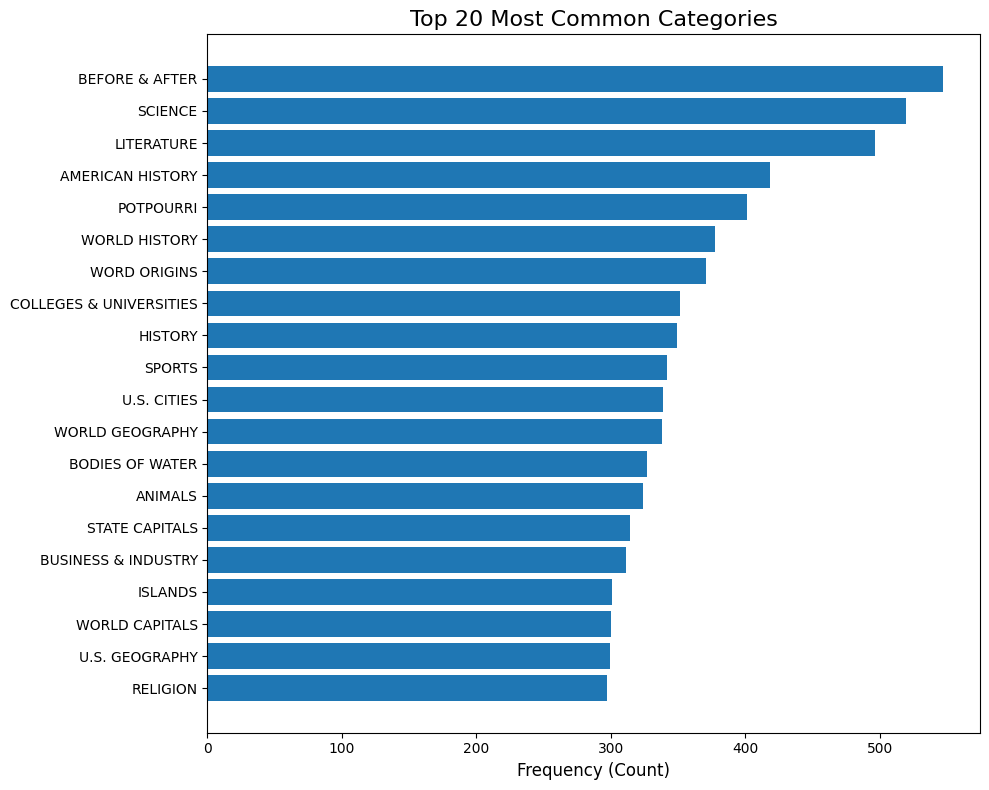

In [20]:
# Get the 20 most common categories
top_categories = category_counts.most_common(20)

# We need to reverse the list so the most common is at the top
top_categories.reverse()

# Unzip into labels and counts
labels = [item[0] for item in top_categories]
counts = [item[1] for item in top_categories]

# Create the plot
plt.figure(figsize=(10, 8))
plt.barh(labels, counts)
plt.title('Top 20 Most Common Categories', fontsize=16)
plt.xlabel('Frequency (Count)', fontsize=12)
plt.tight_layout() # Fits long labels
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_16448\3245797958.py:15: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=len(labels)/2) # Show fewer x-ticks


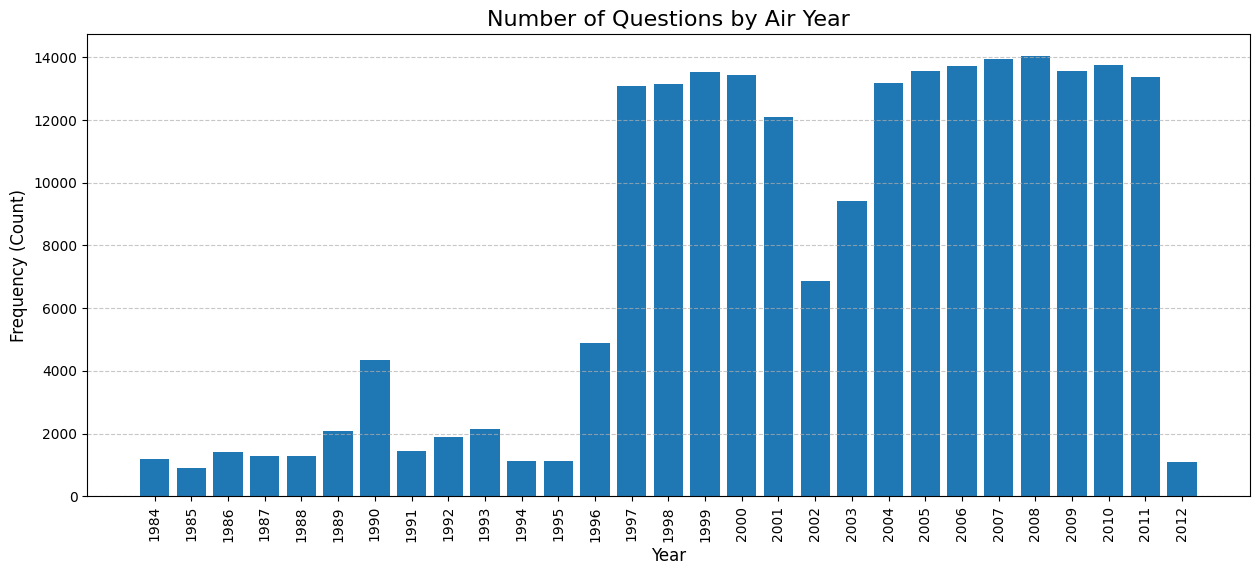

In [22]:
# Sort the years
sorted_years = sorted(year_counts.items())

# Unzip
labels = [item[0] for item in sorted_years]
counts = [item[1] for item in sorted_years]

# Create the plot
plt.figure(figsize=(15, 6))
plt.bar(labels, counts)
plt.title('Number of Questions by Air Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Frequency (Count)', fontsize=12)
plt.xticks(rotation=90)
plt.locator_params(axis='x', nbins=len(labels)/2) # Show fewer x-ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

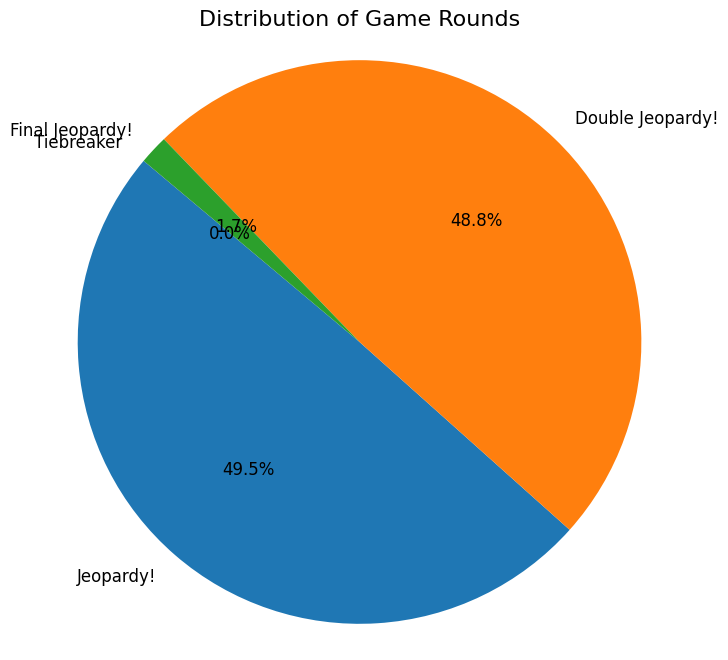

In [23]:
# Unzip
labels = round_counts.keys()
counts = round_counts.values()

# Create the plot
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140,
        textprops={'fontsize': 12})
plt.title('Distribution of Game Rounds', fontsize=16)
plt.axis('equal') # Ensures the pie is a circle
plt.show()

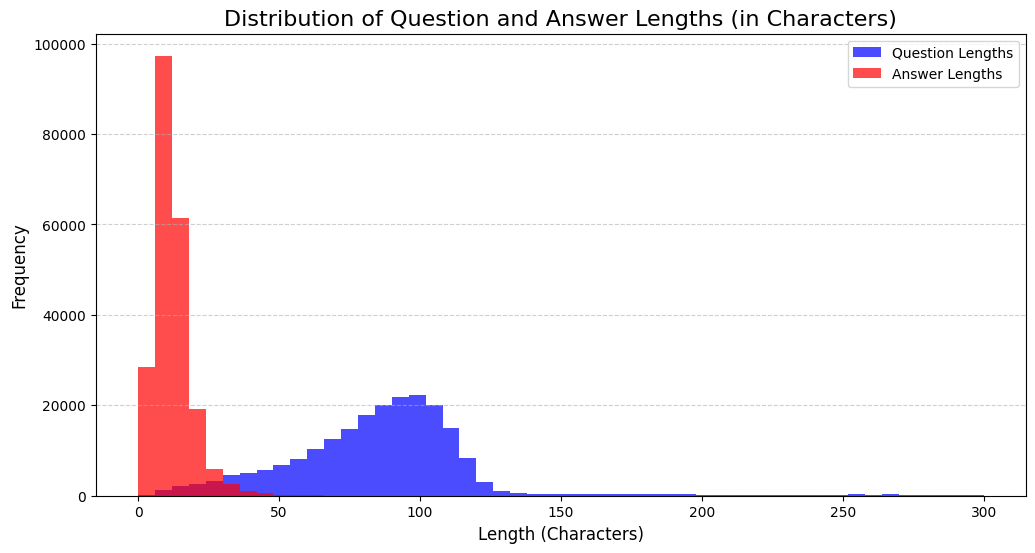

In [24]:
plt.figure(figsize=(12, 6))

# Plot question lengths
plt.hist(question_lengths, bins=50, alpha=0.7, color='blue', label='Question Lengths', range=(0, 300))

# Plot answer lengths
plt.hist(answer_lengths, bins=50, alpha=0.7, color='red', label='Answer Lengths', range=(0, 300))

plt.title('Distribution of Question and Answer Lengths (in Characters)', fontsize=16)
plt.xlabel('Length (Characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()